# **Decision tree Classification**


![alt text](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)


**Case Study :** We have the historical data of a car showroom with age as input variable and purchased as the output variable. X → Age , Y→ Purchased
Based on the age of the customer we will predict whether the person is more likely to buy the car from the showroom or not.

![alt text](https://lh4.googleusercontent.com/OzoII5Ah9P2UBkhfSFi9RPif1p5OzTFnBTkej3bUuJ2gic-XRCjFdLFo79oNqRVoV2TX4c9Gr2z3gA_V-7oH4cDrR-pTyg_8WGvi9bqbsObAWdwMlia2KXAhRpEEja_psKJFd9s7)

- step 1 : Choose splitting criteria Here, 3
- Step 2 : Choose one variable from input variable x. here since we have only one variable we will choose Age.
-Step 3 : Choose a value from the minimum and maximum value from that column. Suppose here we choose it as age >  25.

![alt text](https://lh4.googleusercontent.com/7ojrPAmq--2h2VPhRtuhZscIx_xiclwWQJtRX5KMQ3RP7p0zVaqtd6xdOJrY7hKZgO3ZIY-fNIRcK8SWNtkV1aJTdGT5Pa8NMtC9p1lnZm-4feELwCYcbOcF_GQlyOmaUbRoXg3G)

We will continue dividing each part as long as the splitting criteria is satisfied.



![alt text](https://lh5.googleusercontent.com/K8h9a-zy218HK37p_g1Q_mbi3KyiZDofrND7uZeKy5RB2aPgVFLRG11ZAEsmftzNGAq39bhhAzZ60C_mYnirJhGC1KAZrkUa7djfu9v0MtwXaLeUUCSuAxSKGVWa6hGN31f5YDen)

- Step 4 : Decision.
In This case the decision is not based on the average, rather it is based on the majority.

So according to the majority, the decision for each group can be made as follows:

![alt text](https://lh3.googleusercontent.com/O0yjubYuRuESap_NWO9-N341w8eexEP291D53yRrdZZZXhuB1e67iwPkMRt1W7ztHTiYwMmW0dioBCK8L5_G0apr32QEV4TGx7pDDeucEFK1pCKDKK3gbitwNOW0BFpeEec_5hQ2)

**FLOWCHART :**

![alt text](https://lh5.googleusercontent.com/gnBKQK30B3I6G2qyb-1Tx93JUnDuSriJ6fab1fwpQ3UlQiPn2frTSF1LR6GA6eVbwGag9uULj3mnX13-sQ83jb2tIiHBHyDr59mV15G8H71g2JPcrrR0QcmHnnQSXzA9lCRxD_-F)


**Note: If we evey have a situation where we get equal number of 0 and 1 in a group of two, we will give it the benefit of doubt and give the decision as 1**



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data_folder/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
X = df.iloc[ : , 2:4 ].values
Y = df.iloc[:, 4:5].values

In [6]:
#imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer.fit(X[:,0:2]) #learn, identify
X[:,0:2] = imputer.transform(X[:,0:2])

In [7]:
# let's split our data into two categories test data ad train data
# for that we will use train_test_split method and we will assign test_size

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y)

In [8]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(320, 80, 320, 80)

In [9]:
pd.Series(Y_train.ravel()).value_counts()

0    206
1    114
Name: count, dtype: int64

In [10]:
pd.Series(Y_test.ravel()).value_counts()

0    51
1    29
Name: count, dtype: int64

In [33]:
#dtclass
from sklearn.tree import DecisionTreeClassifier
dtclass = DecisionTreeClassifier(criterion='entropy', max_depth=9)
dtclass.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [34]:
# let's predict our X_test data

Y_pred = dtclass.predict(X_test)
Y_pred, Y_test.ravel()

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]))

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[48,  3],
       [ 9, 20]])

In [36]:
dtclass.score(X_train, Y_train)

0.98125

In [37]:
dtclass.score(X_test, Y_test)

0.85

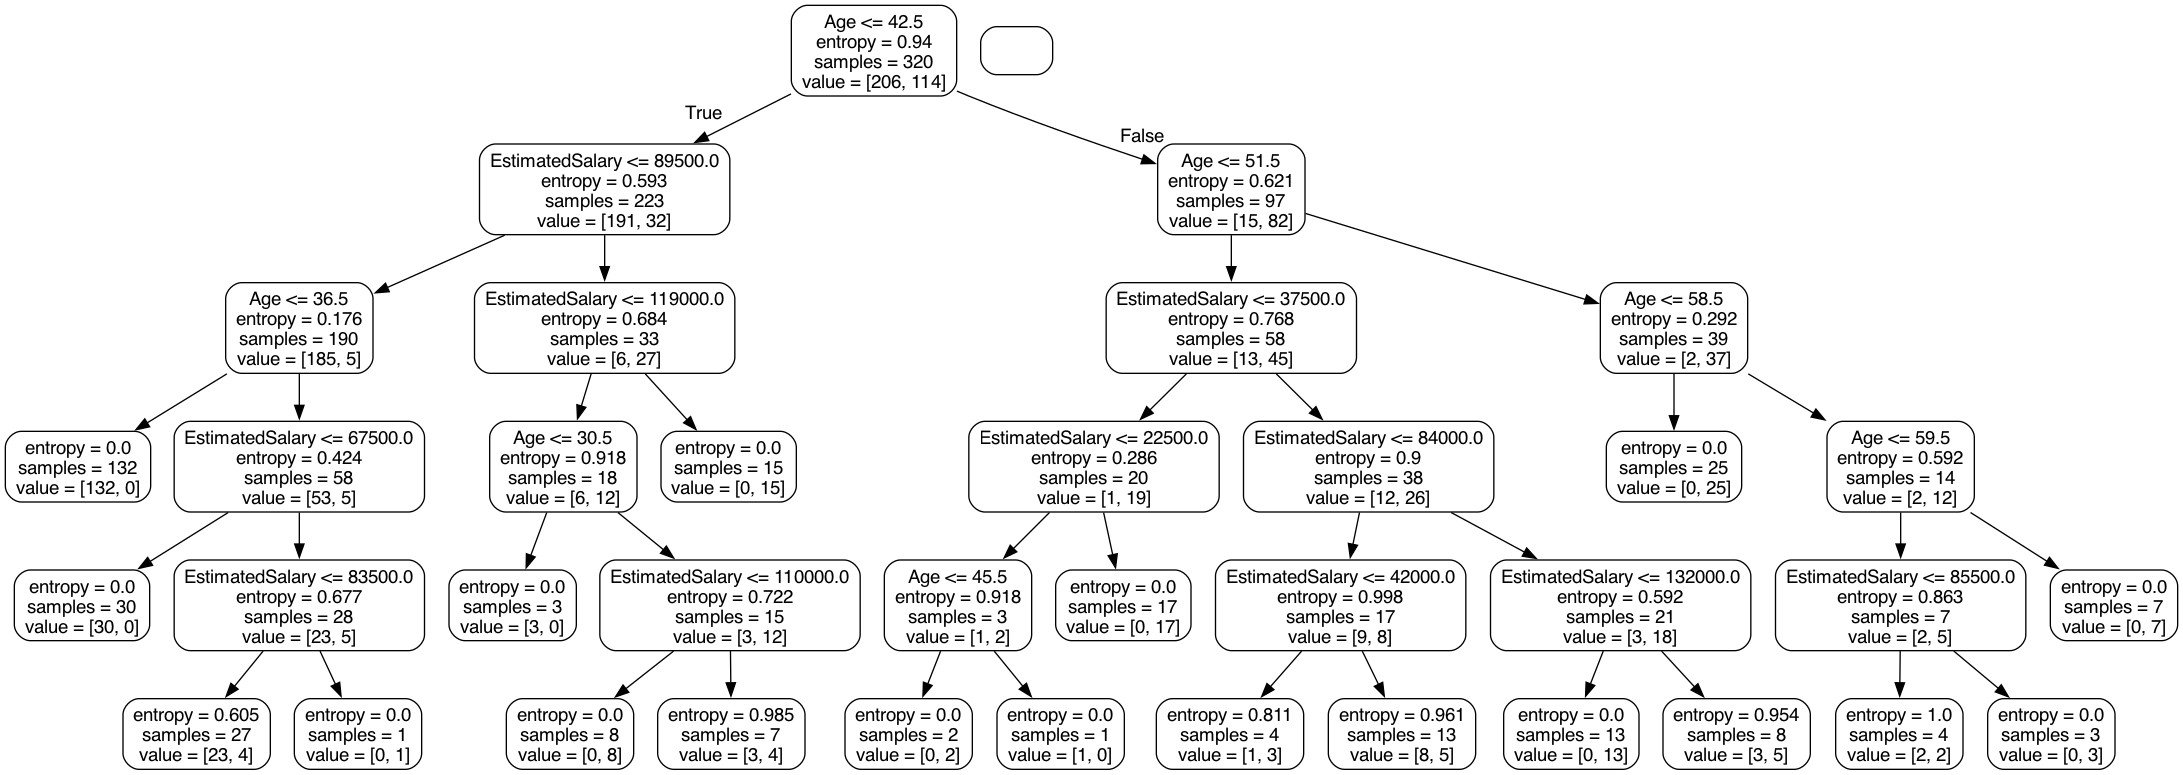

In [32]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(
    decision_tree = dtclass,
    out_file = dot_data,
    rounded = True,
    feature_names = ['Age',	'EstimatedSalary'],
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[44,  7],
       [ 5, 24]])

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(95.72222222222221, 0.5, 'predicted')

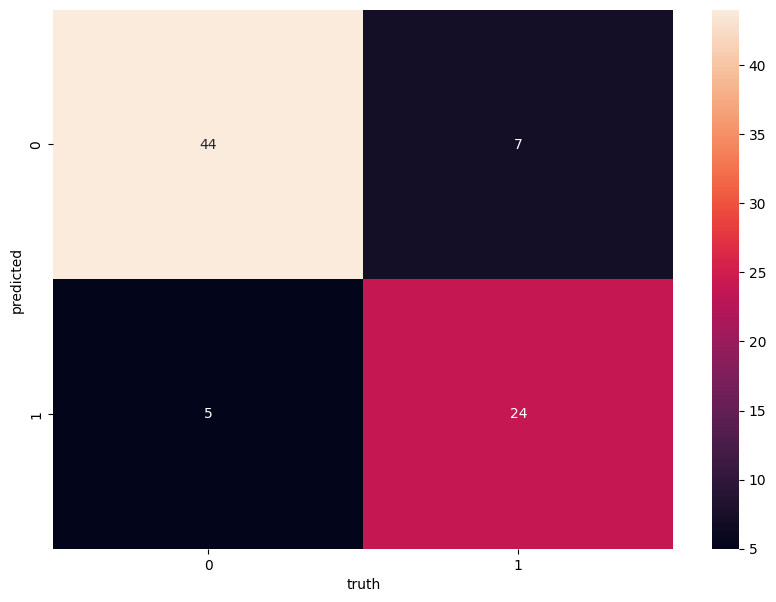

In [32]:
plt.figure(figsize=(10,7))

sns.heatmap(cm, annot=True)

plt.xlabel('truth')
plt.ylabel('predicted')